Modelo Clasificación: Realimentado por los datos de la primera función.

Preprocesamiento de datos

In [281]:
class Column:
    def __init__(self, name, usp_code, length, particle_size, temperature, flowrate, t0):
        self.name = name
        self.usp_code = usp_code
        self.length = length
        self.particle_size = particle_size
        self.temperature = temperature
        self.flowrate = flowrate
        self.t0 = t0
    
    def __eq__(self, value):
        if not isinstance(value, Column):
            return False
        return (
            self.usp_code == value.usp_code and
            self.particle_size == value.particle_size and
            self.temperature == value.temperature and
            self.flowrate == value.flowrate and
            self.t0 == value.t0
        )
    
    def __hash__(self):
        return hash((
            self.usp_code,
            self.particle_size,
            self.temperature,
            self.flowrate,
            self.t0
        ))
    
    def __repr__(self):
        return f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, columna={repr(self.columna)})"
    def __str__(self):
        return f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, columna={repr(self.columna)})"


class Config:
    def __init__(self, eluyente1, eluyente2, ph1, ph2, eluyente_1_gradiente, eluyente_2_gradiente, t_gradiente, columna:Column):
        self.eluyente1 = eluyente1
        self.eluyente2 = eluyente2
        self.ph1 = ph1
        self.ph2 = ph2
        self.eluyente_1_gradiente = eluyente_1_gradiente
        self.eluyente_2_gradiente = eluyente_2_gradiente
        self.t_gradiente = t_gradiente
        self.columna = columna

    def __eq__(self, value):
        if not isinstance(value, Config):
            return False
        return (
            self.eluyente1 == value.eluyente1 and
            self.eluyente2 == value.eluyente2 and
            self.ph1 == value.ph1 and
            self.ph2 == value.ph2 and
            self.eluyente_1_gradiente == value.eluyente_1_gradiente and
            self.eluyente_2_gradiente == value.eluyente_2_gradiente and
            self.t_gradiente == value.t_gradiente and
            self.columna == value.columna
        )
    
    def __hash__(self):
        return hash((
            self.eluyente1, 
            self.eluyente2, 
            self.ph1, 
            self.ph2, 
            tuple(self.eluyente_1_gradiente),  
            tuple(self.eluyente_2_gradiente),  
            tuple(self.t_gradiente),           
            self.columna
        ))
        
    def __repr__(self):
        return (f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, "
                    f"ph1={self.ph1}, ph2={self.ph2}, "
                    f"eluyente_1_gradiente={self.eluyente_1_gradiente}, eluyente_2_gradiente={self.eluyente_2_gradiente}, t_gradiente={self.t_gradiente}, "
                    f"columna=Column(name={self.columna.name}, usp_code={self.columna.usp_code}, "
                    f"length={self.columna.length}, "
                    f"particle_size={self.columna.particle_size}, temperature={self.columna.temperature}, "
                    f"flowrate={self.columna.flowrate}, t0={self.columna.t0}))")
    
    def __str__(self):
            return (f"Config(eluyente1={self.eluyente1}, eluyente2={self.eluyente2}, "
                    f"ph1={self.ph1}, ph2={self.ph2}, "
                    f"eluyente_1_gradiente={self.eluyente_1_gradiente}, eluyente_2_gradiente={self.eluyente_2_gradiente}, t_gradiente={self.t_gradiente}, "
                    f"columna=Column(name={self.columna.name}, usp_code={self.columna.usp_code}, "
                    f"length={self.columna.length}, "
                    f"particle_size={self.columna.particle_size}, temperature={self.columna.temperature}, "
                    f"flowrate={self.columna.flowrate}, t0={self.columna.t0}))")

In [282]:
import pandas as pd

In [283]:
df = pd.read_csv("../../../data/output_funcion_1_gth_4.csv")

In [284]:
from collections import defaultdict

configs_by_class = defaultdict(set)
classes = df['Clase'].unique()
configs_by_class = {clase: set() for clase in classes}

for i, row in df.iterrows():
    configs_by_class[row["Clase"]].add(
        Config(
            row["Eluyente1"],
            row["Eluyente2"],
            row["pH1"],
            row["pH2"],
            row["Eluyente1 Gradiente"],
            row["Eluyente2 Gradiente"],
            row["T Gradiente"], 
            Column(
                row["Columna Nombre"],
                row["USP Code"],
                row["Longitud"],
                row["Tamaño de Partícula"],
                row["Temperatura"],
                row["Flujo"],
                row["T0"]
            )
        )
    )


In [285]:
from collections import Counter

# Lista con la cantidad de configuraciones por clase
n_configuraciones = [len(configs) for configs in configs_by_class.values()]

# Contar cuántas clases tienen menos de x configuraciones
conteo = {}
total_clases = len(n_configuraciones)  # Total de clases
for limite in range(4, 100): 
    conteo[f"< {limite}"] = sum(1 for n in n_configuraciones if n < limite)

# Mostrar los resultados en formato N/TOTAL
for k, v in conteo.items():
    print(f"Clases con {k} configuraciones: {v}/{total_clases}")



Clases con < 4 configuraciones: 100/137
Clases con < 5 configuraciones: 103/137
Clases con < 6 configuraciones: 104/137
Clases con < 7 configuraciones: 107/137
Clases con < 8 configuraciones: 107/137
Clases con < 9 configuraciones: 109/137
Clases con < 10 configuraciones: 109/137
Clases con < 11 configuraciones: 109/137
Clases con < 12 configuraciones: 109/137
Clases con < 13 configuraciones: 111/137
Clases con < 14 configuraciones: 111/137
Clases con < 15 configuraciones: 111/137
Clases con < 16 configuraciones: 111/137
Clases con < 17 configuraciones: 111/137
Clases con < 18 configuraciones: 111/137
Clases con < 19 configuraciones: 112/137
Clases con < 20 configuraciones: 112/137
Clases con < 21 configuraciones: 113/137
Clases con < 22 configuraciones: 115/137
Clases con < 23 configuraciones: 116/137
Clases con < 24 configuraciones: 119/137
Clases con < 25 configuraciones: 119/137
Clases con < 26 configuraciones: 121/137
Clases con < 27 configuraciones: 121/137
Clases con < 28 config

In [286]:
# Filtrar las clases con más de 9 configuraciones
clases_mayores_a_7 = [clase for clase, configs in configs_by_class.items() if len(configs) > 7]

# Mostrar los nombres de las clases
print(clases_mayores_a_7)


['Benzene and substituted derivatives (CHEMONTID:0002279)', 'Cinnamic acids and derivatives (CHEMONTID:0000476)', 'Coumarins and derivatives (CHEMONTID:0000145)', 'Organooxygen compounds (CHEMONTID:0000323)', 'Prenol lipids (CHEMONTID:0000259)', 'Carboxylic acids and derivatives (CHEMONTID:0000265)', 'Fatty Acyls (CHEMONTID:0003909)', 'Organonitrogen compounds (CHEMONTID:0000278)', 'Diazines (CHEMONTID:0001346)', 'Imidazopyrimidines (CHEMONTID:0001797)', 'Indoles and derivatives (CHEMONTID:0000211)', 'Purine nucleotides (CHEMONTID:0001506)', 'Keto acids and derivatives (CHEMONTID:0000389)', 'Phenols (CHEMONTID:0000134)', 'Phenol ethers (CHEMONTID:0002341)', 'Hydroxy acids and derivatives (CHEMONTID:0000472)', 'Steroids and steroid derivatives (CHEMONTID:0000258)', 'Lactones (CHEMONTID:0000050)', 'Pteridines and derivatives (CHEMONTID:0000109)', 'Pyridines and derivatives (CHEMONTID:0000089)', 'Pyrimidine nucleosides (CHEMONTID:0000480)', 'Purine nucleosides (CHEMONTID:0000479)', 'Pheny

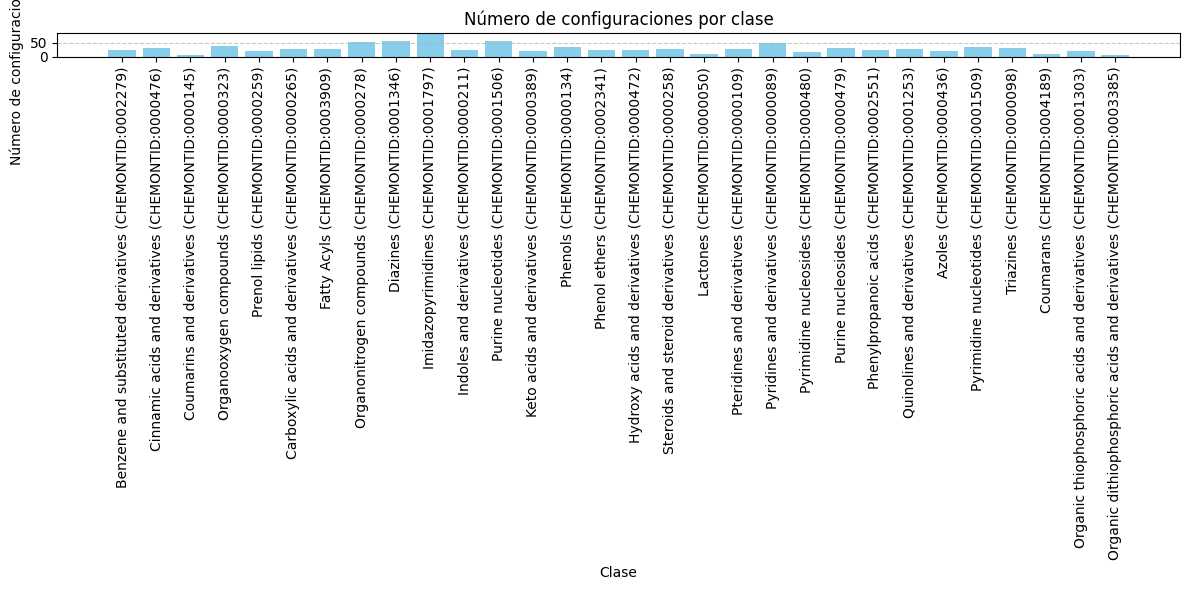

In [287]:
import matplotlib.pyplot as plt

# Preparar los datos
n_configuraciones = [len(configs) for _, configs in configs_by_class.items() if len(configs) > 7]

# Crear el histograma
plt.figure(figsize=(12, 6))
plt.bar(clases_mayores_a_7, n_configuraciones, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel("Clase")
plt.ylabel("Número de configuraciones únicas")
plt.title("Número de configuraciones por clase")
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [288]:
#['Benzene and substituted derivatives (CHEMONTID:0002279)', 'Cinnamic acids and derivatives (CHEMONTID:0000476)', 'Organooxygen compounds (CHEMONTID:0000323)', 'Prenol lipids (CHEMONTID:0000259)', 'Carboxylic acids and derivatives (CHEMONTID:0000265)', 'Fatty Acyls (CHEMONTID:0003909)', 'Organonitrogen compounds (CHEMONTID:0000278)', 'Diazines (CHEMONTID:0001346)', 'Imidazopyrimidines (CHEMONTID:0001797)', 'Indoles and derivatives (CHEMONTID:0000211)', 'Purine nucleotides (CHEMONTID:0001506)', 'Keto acids and derivatives (CHEMONTID:0000389)', 'Phenols (CHEMONTID:0000134)', 'Phenol ethers (CHEMONTID:0002341)', 'Hydroxy acids and derivatives (CHEMONTID:0000472)', 'Steroids and steroid derivatives (CHEMONTID:0000258)', 'Lactones (CHEMONTID:0000050)', 'Pteridines and derivatives (CHEMONTID:0000109)', 'Pyridines and derivatives (CHEMONTID:0000089)', 'Pyrimidine nucleosides (CHEMONTID:0000480)', 'Purine nucleosides (CHEMONTID:0000479)', 'Phenylpropanoic acids (CHEMONTID:0002551)', 'Quinolines and derivatives (CHEMONTID:0001253)', 'Azoles (CHEMONTID:0000436)', 'Pyrimidine nucleotides (CHEMONTID:0001509)', 'Triazines (CHEMONTID:0000098)', 'Coumarans (CHEMONTID:0004189)', 'Organic thiophosphoric acids and derivatives (CHEMONTID:0001303)']
df_filtrado = df[df["Clase"].isin(clases_mayores_a_7)]


In [289]:
df_filtrado.columns

Index(['Clase', 'Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Eluyente1 Gradiente',
       'Eluyente2 Gradiente', 'T Gradiente', 'Columna Nombre', 'USP Code',
       'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0',
       'Score', 'n_datos'],
      dtype='object')

Ingeniería de Características

In [290]:
import numpy as np
#from scipy.stats import skew, kurtosis

def extraer_features_gradiente(e1, e2):
    # Convertir los strings a arrays de floats
    v1 = np.array([float(x.strip()) for x in e1.split(",") if x.strip()])
    v2 = np.array([float(x.strip()) for x in e2.split(",") if x.strip()])

    # Asegurarte de que ambas listas tengan la misma longitud
    if len(v1) != len(v2):
        # Puedes rellenar con ceros, cortar o lanzar error. Aquí igualamos tamaño con padding.
        max_len = max(len(v1), len(v2))
        v1 = np.pad(v1, (0, max_len - len(v1)), 'constant')
        v2 = np.pad(v2, (0, max_len - len(v2)), 'constant')

    # Calcular diferencia
    valores = v1 - v2
    
    # Asegurarse de que la lista no esté vacía
    if len(valores) == 0:
        valores = [0.0] * 18  # Asignamos un valor por defecto si la lista está vacía
    
    # Calcular estadísticas del gradiente
    features = {
        #"eluyente_mean": np.mean(valores),        # Promedio
        #"eluyente_std": np.std(valores),          # Desviación estándar
        "diff_eluyentes_dispersion": np.std(valores)/np.mean(valores),
        "diff_eluyentes_min": np.min(valores),          # Valor mínimo
        "diff_eluyentes_max": np.max(valores)          # Valor máximo
        #"eluyente_nonzero": sum(1 for x in valores if x > 0),  # Cantidad de valores no cero
        #"eluyente_zero_count": sum(1 for x in valores if x == 0),  # Cantidad de ceros
        #"eluyente_median": np.median(valores),     # Mediana
        #"eluyente_skew": skew(valores),           # Asimetría
        #"eluyente_kurtosis": kurtosis(valores)    # Curtosis
    }
    
    return features

def extraer_features_tiempo(grad):
    # Convertir el string en lista de floats
    valores = [float(x.strip()) for x in grad.split(",") if x.strip()]
    
    # Asegurarse de que la lista no esté vacía
    if len(valores) == 0:
        valores = [0.0] * 18  # Asignamos un valor por defecto si la lista está vacía
    
    # Calcular estadísticas del tiempo
    features = {
        #"tiempo_mean": np.mean(valores),           # Promedio del tiempo
        #"tiempo_std": np.std(valores),             # Desviación estándar del tiempo
        "tiempo_dispersion": np.std(valores)/np.mean(valores),
        "tiempo_min": np.min(valores),             # Tiempo mínimo
        "tiempo_max": np.max(valores),             # Tiempo máximo
        "tiempo_nonzero": sum(1 for x in valores if x > 0) + 1 if valores[0]==0 else sum(1 for x in valores if x > 0)
        #"tiempo_zero_count": sum(1 for x in valores if x == 0),  # Cantidad de ceros en el tiempo
        #"tiempo_median": np.median(valores),       # Mediana del tiempo
        #"tiempo_cumsum": np.cumsum(valores)[-1],   # Suma acumulada del tiempo
        #"tiempo_dif_max": np.max(np.diff(valores)) # Diferencia máxima entre dos tiempos consecutivos
    }
    
    return features


def extraer_features_gradiente_2(e1, e2, t):
    v1 = np.array([float(x.strip()) for x in e1.split(",") if x.strip()])
    v2 = np.array([float(x.strip()) for x in e2.split(",") if x.strip()])
    t_valores = [float(x.strip()) for x in t.split(",") if x.strip()]

    if len(v1) != len(v2):
        max_len = max(len(v1), len(v2))
        v1 = np.pad(v1, (0, max_len - len(v1)), 'constant')
        v2 = np.pad(v2, (0, max_len - len(v2)), 'constant')

    valores = v1 - v2
    
    if len(valores) == 0:
        valores = [0.0] * 18 
    
    features = {}

    for i, valor in enumerate(valores):
        features[f"Diff_eluents_{i}"] = valor
        features[f"Time_{i}"] = t_valores[i]
    
    return features

In [291]:
import re

def get_usp_code(text):
    match = re.search(r'[^.]+$', text)
    if match:
        return match.group()
    return None


In [292]:
df_filtrado["ph_diff"] = df_filtrado["pH1"] - df_filtrado["pH2"]
df_filtrado["Flujo_T0_ratio"] = df_filtrado["Flujo"] / df_filtrado["T0"]
df_filtrado["usp"] = df_filtrado["USP Code"].apply(lambda code: get_usp_code(code))

df_input2 = df_filtrado.copy()

features_df_gradiente = df_filtrado.apply( lambda row: extraer_features_gradiente(row["Eluyente1 Gradiente"], row["Eluyente2 Gradiente"]), axis=1).apply(pd.Series)
features_df_tiempo = df_filtrado["T Gradiente"].apply(extraer_features_tiempo).apply(pd.Series)
df_filtrado = pd.concat([df_filtrado, features_df_gradiente, features_df_tiempo], axis=1)

features = df_input2.apply( lambda row: extraer_features_gradiente_2(row["Eluyente1 Gradiente"], row["Eluyente2 Gradiente"], row["T Gradiente"]), axis=1).apply(pd.Series)
df_input2 = pd.concat([df_input2, features], axis=1)

C:\Users\cmora\AppData\Local\Temp\ipykernel_46620\863776469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["ph_diff"] = df_filtrado["pH1"] - df_filtrado["pH2"]
C:\Users\cmora\AppData\Local\Temp\ipykernel_46620\863776469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["Flujo_T0_ratio"] = df_filtrado["Flujo"] / df_filtrado["T0"]
C:\Users\cmora\AppData\Local\Temp\ipykernel_46620\863776469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [293]:
df_filtrado.columns

Index(['Clase', 'Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Eluyente1 Gradiente',
       'Eluyente2 Gradiente', 'T Gradiente', 'Columna Nombre', 'USP Code',
       'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0',
       'Score', 'n_datos', 'ph_diff', 'Flujo_T0_ratio', 'usp',
       'diff_eluyentes_dispersion', 'diff_eluyentes_min', 'diff_eluyentes_max',
       'tiempo_dispersion', 'tiempo_min', 'tiempo_max', 'tiempo_nonzero'],
      dtype='object')

In [294]:
df_input2.columns

Index(['Clase', 'Eluyente1', 'Eluyente2', 'pH1', 'pH2', 'Eluyente1 Gradiente',
       'Eluyente2 Gradiente', 'T Gradiente', 'Columna Nombre', 'USP Code',
       'Longitud', 'Tamaño de Partícula', 'Temperatura', 'Flujo', 'T0',
       'Score', 'n_datos', 'ph_diff', 'Flujo_T0_ratio', 'usp',
       'Diff_eluents_0', 'Time_0', 'Diff_eluents_1', 'Time_1',
       'Diff_eluents_2', 'Time_2', 'Diff_eluents_3', 'Time_3',
       'Diff_eluents_4', 'Time_4', 'Diff_eluents_5', 'Time_5',
       'Diff_eluents_6', 'Time_6', 'Diff_eluents_7', 'Time_7',
       'Diff_eluents_8', 'Time_8', 'Diff_eluents_9', 'Time_9',
       'Diff_eluents_10', 'Time_10', 'Diff_eluents_11', 'Time_11',
       'Diff_eluents_12', 'Time_12', 'Diff_eluents_13', 'Time_13',
       'Diff_eluents_14', 'Time_14', 'Diff_eluents_15', 'Time_15',
       'Diff_eluents_16', 'Time_16', 'Diff_eluents_17', 'Time_17'],
      dtype='object')

In [295]:
df_input = df_filtrado[[
    "Clase",
    "Eluyente1",
    "Eluyente2",
    "ph_diff",
    "diff_eluyentes_dispersion",
    "diff_eluyentes_min",
    "diff_eluyentes_max",
    "tiempo_max",
    "tiempo_min",
    "tiempo_dispersion",
    "tiempo_nonzero",
    "usp",
    "Longitud",
    "Tamaño de Partícula",
    "Temperatura",
    "Flujo_T0_ratio",
    "Score"
    ]]

In [296]:
df_input2 = df_input2[[
    'Clase', 'Eluyente1', 'Eluyente2',
       'Longitud', 'Tamaño de Partícula', 'Temperatura','Score', 'ph_diff', 'Flujo_T0_ratio', 'usp',
       'Diff_eluents_0', 'Time_0', 'Diff_eluents_1', 'Time_1',
       'Diff_eluents_2', 'Time_2', 'Diff_eluents_3', 'Time_3',
       'Diff_eluents_4', 'Time_4', 'Diff_eluents_5', 'Time_5',
       'Diff_eluents_6', 'Time_6', 'Diff_eluents_7', 'Time_7',
       'Diff_eluents_8', 'Time_8', 'Diff_eluents_9', 'Time_9',
       'Diff_eluents_10', 'Time_10', 'Diff_eluents_11', 'Time_11',
       'Diff_eluents_12', 'Time_12', 'Diff_eluents_13', 'Time_13',
       'Diff_eluents_14', 'Time_14', 'Diff_eluents_15', 'Time_15',
       'Diff_eluents_16', 'Time_16', 'Diff_eluents_17', 'Time_17'
]]

In [297]:
df_input2.columns

Index(['Clase', 'Eluyente1', 'Eluyente2', 'Longitud', 'Tamaño de Partícula',
       'Temperatura', 'Score', 'ph_diff', 'Flujo_T0_ratio', 'usp',
       'Diff_eluents_0', 'Time_0', 'Diff_eluents_1', 'Time_1',
       'Diff_eluents_2', 'Time_2', 'Diff_eluents_3', 'Time_3',
       'Diff_eluents_4', 'Time_4', 'Diff_eluents_5', 'Time_5',
       'Diff_eluents_6', 'Time_6', 'Diff_eluents_7', 'Time_7',
       'Diff_eluents_8', 'Time_8', 'Diff_eluents_9', 'Time_9',
       'Diff_eluents_10', 'Time_10', 'Diff_eluents_11', 'Time_11',
       'Diff_eluents_12', 'Time_12', 'Diff_eluents_13', 'Time_13',
       'Diff_eluents_14', 'Time_14', 'Diff_eluents_15', 'Time_15',
       'Diff_eluents_16', 'Time_16', 'Diff_eluents_17', 'Time_17'],
      dtype='object')

In [298]:
df_input.columns = ['Class', "Eluent1", "Eluent2", "PH_diff", "Diff_eluents_dispersion", "Diff_eluents_min", "Diff_eluents_max", "Time_max", "Time_min", "Time_dispersion", "Time_nonzero", "USP", "Length", "Particle_size", "Temperature", "Flow_T0_ratio", "Score"]

In [299]:
df_input2.columns = ['Class', 'Eluent1', 'Eluent2',
       'Length', 'Particle_size', 'Temperature','Score', 'PH_diff', 'Flow_T0_ratio', 'USP',
       'Diff_eluents_0', 'Time_0', 'Diff_eluents_1', 'Time_1',
       'Diff_eluents_2', 'Time_2', 'Diff_eluents_3', 'Time_3',
       'Diff_eluents_4', 'Time_4', 'Diff_eluents_5', 'Time_5',
       'Diff_eluents_6', 'Time_6', 'Diff_eluents_7', 'Time_7',
       'Diff_eluents_8', 'Time_8', 'Diff_eluents_9', 'Time_9',
       'Diff_eluents_10', 'Time_10', 'Diff_eluents_11', 'Time_11',
       'Diff_eluents_12', 'Time_12', 'Diff_eluents_13', 'Time_13',
       'Diff_eluents_14', 'Time_14', 'Diff_eluents_15', 'Time_15',
       'Diff_eluents_16', 'Time_16', 'Diff_eluents_17', 'Time_17']

In [300]:
df_input.columns

Index(['Class', 'Eluent1', 'Eluent2', 'PH_diff', 'Diff_eluents_dispersion',
       'Diff_eluents_min', 'Diff_eluents_max', 'Time_max', 'Time_min',
       'Time_dispersion', 'Time_nonzero', 'USP', 'Length', 'Particle_size',
       'Temperature', 'Flow_T0_ratio', 'Score'],
      dtype='object')

In [301]:
df_input2.columns

Index(['Class', 'Eluent1', 'Eluent2', 'Length', 'Particle_size', 'Temperature',
       'Score', 'PH_diff', 'Flow_T0_ratio', 'USP', 'Diff_eluents_0', 'Time_0',
       'Diff_eluents_1', 'Time_1', 'Diff_eluents_2', 'Time_2',
       'Diff_eluents_3', 'Time_3', 'Diff_eluents_4', 'Time_4',
       'Diff_eluents_5', 'Time_5', 'Diff_eluents_6', 'Time_6',
       'Diff_eluents_7', 'Time_7', 'Diff_eluents_8', 'Time_8',
       'Diff_eluents_9', 'Time_9', 'Diff_eluents_10', 'Time_10',
       'Diff_eluents_11', 'Time_11', 'Diff_eluents_12', 'Time_12',
       'Diff_eluents_13', 'Time_13', 'Diff_eluents_14', 'Time_14',
       'Diff_eluents_15', 'Time_15', 'Diff_eluents_16', 'Time_16',
       'Diff_eluents_17', 'Time_17'],
      dtype='object')

Evaluación de características

In [302]:
# Estadísticas descriptivas para las características numéricas
df_input.describe()

# Contar valores nulos en las columnas
df_input.isnull().sum()

# Contar clases para ver si hay desbalance
df_input['Class'].value_counts()


c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Class
Imidazopyrimidines (CHEMONTID:0001797)                                164
Diazines (CHEMONTID:0001346)                                           90
Purine nucleotides (CHEMONTID:0001506)                                 87
Organonitrogen compounds (CHEMONTID:0000278)                           83
Pyridines and derivatives (CHEMONTID:0000089)                          68
Organooxygen compounds (CHEMONTID:0000323)                             51
Triazines (CHEMONTID:0000098)                                          49
Pyrimidine nucleotides (CHEMONTID:0001509)                             46
Purine nucleosides (CHEMONTID:0000479)                                 44
Pteridines and derivatives (CHEMONTID:0000109)                         43
Steroids and steroid derivatives (CHEMONTID:0000258)                   43
Cinnamic acids and derivatives (CHEMONTID:0000476)                     41
Phenols (CHEMONTID:0000134)                                            41
Quinolines and derivatives (CHEM

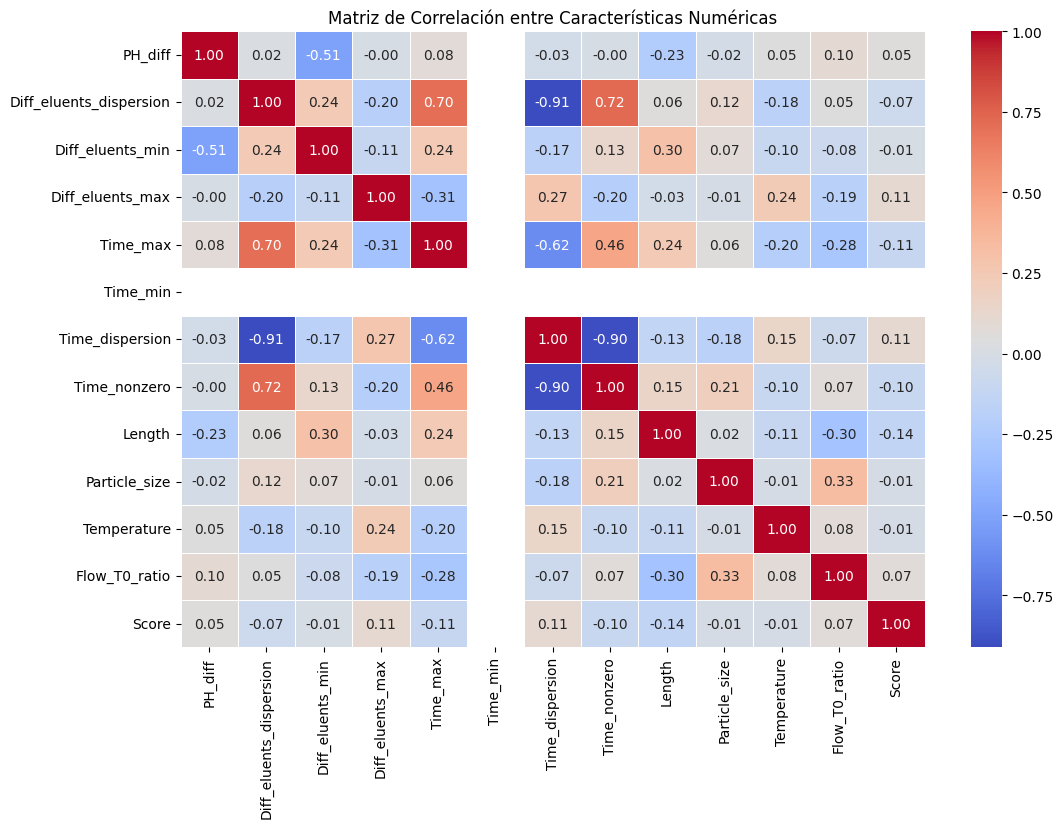

In [303]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_numerico = df_input.select_dtypes(include=['number'])

corr_matrix = df_numerico.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Características Numéricas')
plt.show()

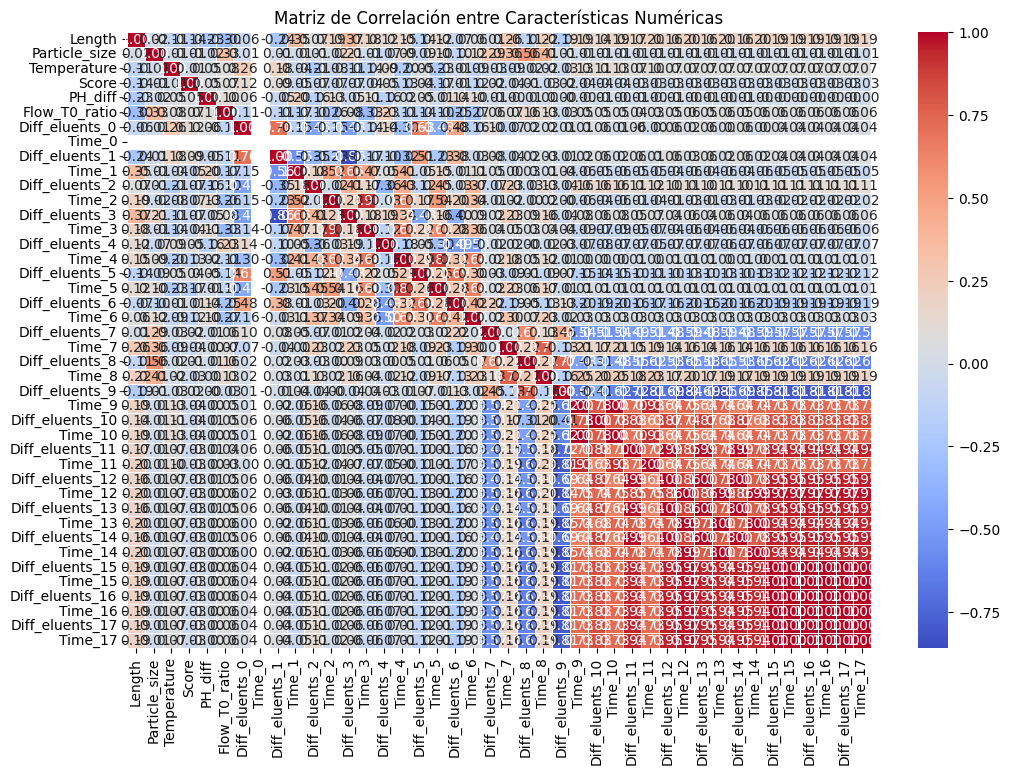

In [304]:
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_numerico = df_input2.select_dtypes(include=['number'])

corr_matrix = df_numerico.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Características Numéricas')
plt.show()


Entrenamiento del modelo 2: (Configuración, Familia) -> (Score)

In [306]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

# ---------- 1. Función de Preprocesamiento ----------
def preprocess_dataframe(df):
    # Separar objetivo (Score)
    y = df["Score"].values
    X = df.drop(columns=["Score"]).copy()

    # Codificación de variables categóricas
    cat_cols = ["Class", "Eluent1", "Eluent2", "USP"]
    
    # Aplicar OrdinalEncoder a las columnas categóricas
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X[cat_cols] = encoder.fit_transform(X[cat_cols])

    return X, y, encoder

# ---------- 2. Preprocesamiento de datos ----------
X_processed, y, encoder = preprocess_dataframe(df_input)

# ---------- 3. Train / Test split ----------
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

# ---------- 4. Entrenamiento del modelo LightGBM ----------
#model = LGBMRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
#model.fit(X_train, y_train)

# ---------- 5. Evaluación del modelo ----------
#y_pred = model.predict(X_test)
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print(f"RMSE: {rmse:.4f}")


In [307]:
# ---------- 5. Modelo LightGBM ----------
model = LGBMRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
model.fit(X_train1, y_train1)

# ---------- 6. Evaluación ----------
y_pred1 = model.predict(X_test1)
rmse = np.sqrt(mean_squared_error(y_test1, y_pred1))
print(f"RMSE: {rmse:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 1043, number of used features: 14
[LightGBM] [Info] Start training from score 0.100811
RMSE: 0.1065


In [308]:
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

imputer = SimpleImputer(strategy='mean')

# Imputamos tanto X_train como X_test
X_train_imputed1 = imputer.fit_transform(X_train1)
X_test_imputed1 = imputer.transform(X_test1)

# Crear y entrenar el modelo de red neuronal
mlp_model = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
mlp_model.fit(X_train_imputed1, y_train1)

# Evaluación del modelo
y_pred_mlp1 = mlp_model.predict(X_test_imputed1)
rmse_mlp = np.sqrt(mean_squared_error(y_test1, y_pred_mlp1))
print(f"RMSE (MLP): {rmse_mlp:.4f}")


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [309]:
# ---------- 8. Modelo Random Forest Regressor ----------
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train1, y_train1)

# Evaluación del modelo
y_pred_rf1 = rf_model.predict(X_test1)
rmse_rf = np.sqrt(mean_squared_error(y_test1, y_pred_rf1))
print(f"RMSE (Random Forest): {rmse_rf:.4f}")

ValueError: Input X contains infinity or a value too large for dtype('float32').

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor


# ---------- 1. Función de Preprocesamiento ----------
def preprocess_dataframe(df):
    y = df["Score"].values
    X = df.drop(columns=["Score"]).copy()

    cat_cols = ["Class", "Eluent1", "Eluent2", "USP"]
    
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
    X[cat_cols] = encoder.fit_transform(X[cat_cols])

    return X, y, encoder

# ---------- 2. Preprocesamiento de datos ----------
X_processed, y, encoder2 = preprocess_dataframe(df_input2)

# ---------- 3. Train / Test split ----------
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)



In [311]:
# ---------- 5. Modelo LightGBM ----------
model2 = LGBMRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
model2.fit(X_train2, y_train2)

# ---------- 6. Evaluación ----------
y_pred2 = model2.predict(X_test2)
rmse = np.sqrt(mean_squared_error(y_test2, y_pred2))
print(f"RMSE: {rmse:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 378
[LightGBM] [Info] Number of data points in the train set: 1043, number of used features: 22
[LightGBM] [Info] Start training from score 0.100811
RMSE: 0.1075


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.impute import SimpleImputer


imputer = SimpleImputer(strategy='mean')

X_train_imputed2 = imputer.fit_transform(X_train2)
X_test_imputed2 = imputer.transform(X_test2)



model_elasticNet = ElasticNet(alpha=0.1, l1_ratio=0.5) 
model_elasticNet.fit(X_train_imputed2, y_train2)
y_pred = model_elasticNet.predict(X_test_imputed2)
rmse_elasticNet = np.sqrt(mean_squared_error(y_test2, y_pred))
print(f"RMSE (MLP): {rmse_elasticNet:.4f}")


RMSE (MLP): 0.1748


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train_imputed2 = imputer.fit_transform(X_train2)
X_test_imputed2 = imputer.transform(X_test2)


poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_imputed2)
X_test_poly = poly.transform(X_test_imputed2)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train2)
y_pred = model.predict(X_test_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test2, y_pred))
print(f"RMSE (MLP): {rmse_poly:.4f}")

c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


ValueError: X has 1081 features, but LGBMRegressor is expecting 16 features as input.

In [312]:
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Imputar los valores faltantes con la media (puedes cambiar 'mean' por 'median' o 'most_frequent')
imputer = SimpleImputer(strategy='mean')

# Imputamos tanto X_train como X_test
X_train_imputed2 = imputer.fit_transform(X_train2)
X_test_imputed2 = imputer.transform(X_test2)

# Crear y entrenar el modelo de red neuronal
mlp_model2 = MLPRegressor(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)
mlp_model2.fit(X_train_imputed2, y_train2)

# Evaluación del modelo
y_pred_mlp2 = mlp_model2.predict(X_test_imputed2)
rmse_mlp = np.sqrt(mean_squared_error(y_test2, y_pred_mlp2))
print(f"RMSE (MLP): {rmse_mlp:.4f}")


RMSE (MLP): 0.3692


In [313]:
# ---------- 8. Modelo Random Forest Regressor ----------
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model2.fit(X_train2, y_train2)

# Evaluación del modelo
y_pred_rf2 = rf_model2.predict(X_test2)
rmse_rf = np.sqrt(mean_squared_error(y_test2, y_pred_rf2))
print(f"RMSE (Random Forest): {rmse_rf:.4f}")

RMSE (Random Forest): 0.1103


In [ ]:
def predecir_score(config, clase, model, encoder):
    
    #['Class', "Eluent1", "Eluent2", "PH_diff", "Diff_eluents_dispersion", "Diff_eluents_min", "Diff_eluents_max", "Time_max", "Time_min", "Time_dispersion", "Time_nonzero", "USP", "Length", "Particle_size", "Temperature", "Flow_T0_ratio", "Score"]
    data = {
        "Class": clase,
        "Eluent1": config.eluyente1,
        "Eluent2": config.eluyente2,
        "PH_diff": config.ph1 - config.ph2,
        "Flow_T0_ratio": config.columna.flowrate - config.columna.t0,
        "USP": get_usp_code(config.columna.usp_code),
        "Length": config.columna.length,
        "Particle_size": config.columna.particle_size,
        "Temperature": config.columna.temperature
    }

    # Agregar features de los gradientes
    data.update(extraer_features_gradiente(config.eluyente_1_gradiente, config.eluyente_2_gradiente))
    data.update(extraer_features_tiempo(config.t_gradiente))

    df_pred = pd.DataFrame([data])

    # Codificación categórica (orden y columnas iguales a entrenamiento)
    cat_cols = ["Class", "Eluent1", "Eluent2", "USP"]
    df_pred[cat_cols] = encoder.transform(df_pred[cat_cols])

    # Predecir
    prediction = model.predict(df_pred)[0]
    return prediction


In [ ]:
def predecir_score_2(config, clase, model, encoder):
    
    data = {
        "Class": clase,
        "Eluent1": config.eluyente1,
        "Eluent2": config.eluyente2,
        "PH_diff": config.ph1 - config.ph2,
        "Flow_T0_ratio": config.columna.flowrate - config.columna.t0,
        "USP": get_usp_code(config.columna.usp_code),
        "Length": config.columna.length,
        "Particle_size": config.columna.particle_size,
        "Temperature": config.columna.temperature
    }

    # Agregar features de los gradientes
    data.update(extraer_features_gradiente_2(config.eluyente_1_gradiente, config.eluyente_2_gradiente, config.t_gradiente))

    df_pred = pd.DataFrame([data])

    # Codificación categórica (orden y columnas iguales a entrenamiento)
    cat_cols = ["Class", "Eluent1", "Eluent2", "USP"]
    df_pred[cat_cols] = encoder.transform(df_pred[cat_cols])

    # Predecir
    prediction = model.predict(df_pred)[0]
    return prediction

In [ ]:
def create_config(row):
    columna = Column(
        name=row['Columna Nombre'], 
        usp_code=row['USP Code'], 
        length=row['Longitud'], 
        particle_size=row['Tamaño de Partícula'], 
        temperature=row['Temperatura'], 
        flowrate=row['Flujo'], 
        t0=row['T0']
    )
    
    return Config(
        eluyente1=row['Eluyente1'], 
        eluyente2=row['Eluyente2'], 
        ph1=row['pH1'], 
        ph2=row['pH2'], 
        eluyente_1_gradiente=row['Eluyente1 Gradiente'], 
        eluyente_2_gradiente=row['Eluyente2 Gradiente'], 
        t_gradiente=row['T Gradiente'], 
        columna=columna
    )

# Aplicar la función para crear la lista de configuraciones
configuraciones = df_filtrado.apply(create_config, axis=1)

In [ ]:
def buscar_clase_con_score_maximo(configuraciones, df):
    """Busca la clase con el Score más alto para cada configuración en el DataFrame.
    Devuelve una lista de tuplas (config, clase, score_maximo).
    """
    resultados = []
    
    for config in configuraciones:
        # Filtrar el DataFrame para las filas que coincidan con la configuración
        filtro = (
            (df['Eluyente1'] == config.eluyente1) &
            (df['Eluyente2'] == config.eluyente2) &
            (df['pH1'] == config.ph1) &
            (df['pH2'] == config.ph2) &
            (df['Eluyente1 Gradiente'] == config.eluyente_1_gradiente) &
            (df['Eluyente2 Gradiente'] == config.eluyente_2_gradiente) &
            (df['T Gradiente'] == config.t_gradiente) &
            (df['Longitud'] == config.columna.length) &
            (df['Tamaño de Partícula'] == config.columna.particle_size) &
            (df['Temperatura'] == config.columna.temperature) &
            (df['Flujo'] == config.columna.flowrate) &
            (df['T0'] == config.columna.t0)
        )
        
        df_filtrado = df[filtro]
        
        if not df_filtrado.empty:
            fila_max_score = df_filtrado.loc[df_filtrado['Score'].idxmax()]
            clase = fila_max_score['Clase']
            score_maximo = fila_max_score['Score']
        else:
            clase = None
            score_maximo = None
        
        resultados.append((config, clase, score_maximo))
    
    return resultados


In [ ]:
config_clase_score = buscar_clase_con_score_maximo(configuraciones=configuraciones, df=df_filtrado)


In [314]:
predecir_score(Config(eluyente1="eluent.1.h2o 0", eluyente2="eluent.2.acn 0", ph1=3.0, ph2=3.0, eluyente_1_gradiente="95.0, 95.0, 50.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", eluyente_2_gradiente="5.0, 5.0, 50.0, 85.0, 85.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", t_gradiente="0.0, 3.0, 5.0, 20.0, 23.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", columna=Column(name="Agilent ZORBAX Extend-C18", usp_code="column.usp.code_L1", length=50.0, particle_size=1.8, temperature=35.0, flowrate=0.1, t0=1.1025)),
    'Benzene and substituted derivatives (CHEMONTID:0002279)',
     model,
     encoder) #0.8426919316255497, en la realidad es 1.0

0.24933345942031016

In [315]:
predecir_score(Config(eluyente1="eluent.1.h2o 0", eluyente2="eluent.2.acn 0", ph1=3.0, ph2=3.0, eluyente_1_gradiente="95.0, 95.0, 50.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", eluyente_2_gradiente="5.0, 5.0, 50.0, 85.0, 85.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", t_gradiente="0.0, 3.0, 5.0, 20.0, 23.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", columna=Column(name="Agilent ZORBAX Extend-C18", usp_code="column.usp.code_L1", length=50.0, particle_size=1.8, temperature=35.0, flowrate=0.1, t0=1.1025)),
    'Benzene and substituted derivatives (CHEMONTID:0002279)',
    mlp_model,
    encoder)

NameError: name 'mlp_model' is not defined

In [316]:
predecir_score(Config(eluyente1="eluent.1.h2o 0", eluyente2="eluent.2.acn 0", ph1=3.0, ph2=3.0, eluyente_1_gradiente="95.0, 95.0, 50.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", eluyente_2_gradiente="5.0, 5.0, 50.0, 85.0, 85.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", t_gradiente="0.0, 3.0, 5.0, 20.0, 23.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", columna=Column(name="Agilent ZORBAX Extend-C18", usp_code="column.usp.code_L1", length=50.0, particle_size=1.8, temperature=35.0, flowrate=0.1, t0=1.1025)),
    'Benzene and substituted derivatives (CHEMONTID:0002279)',
     rf_model,
     encoder)

AttributeError: 'RandomForestRegressor' object has no attribute 'estimators_'

In [317]:
predecir_score_2(Config(eluyente1="eluent.1.h2o 0", eluyente2="eluent.2.acn 0", ph1=3.0, ph2=3.0, eluyente_1_gradiente="95.0, 95.0, 50.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", eluyente_2_gradiente="5.0, 5.0, 50.0, 85.0, 85.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", t_gradiente="0.0, 3.0, 5.0, 20.0, 23.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", columna=Column(name="Agilent ZORBAX Extend-C18", usp_code="column.usp.code_L1", length=50.0, particle_size=1.8, temperature=35.0, flowrate=0.1, t0=1.1025)),
    'Benzene and substituted derivatives (CHEMONTID:0002279)',
     model2,
     encoder2) #0.8426919316255497, en la realidad es 1.0

0.42634163255808105

In [321]:
predecir_score_2(Config(eluyente1="eluent.1.h2o 0", eluyente2="eluent.2.acn 0", ph1=3.0, ph2=3.0, eluyente_1_gradiente="95.0, 95.0, 50.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", eluyente_2_gradiente="5.0, 5.0, 50.0, 85.0, 85.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", t_gradiente="0.0, 3.0, 5.0, 20.0, 23.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", columna=Column(name="Agilent ZORBAX Extend-C18", usp_code="column.usp.code_L1", length=50.0, particle_size=1.8, temperature=35.0, flowrate=0.1, t0=1.1025)),
    'Benzene and substituted derivatives (CHEMONTID:0002279)',
    mlp_model2,
    encoder2)

c:\Users\cmora\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


5.211041066031084

In [322]:
predecir_score_2(Config(eluyente1="eluent.1.h2o 0", eluyente2="eluent.2.acn 0", ph1=3.0, ph2=3.0, eluyente_1_gradiente="95.0, 95.0, 50.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", eluyente_2_gradiente="5.0, 5.0, 50.0, 85.0, 85.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", t_gradiente="0.0, 3.0, 5.0, 20.0, 23.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0", columna=Column(name="Agilent ZORBAX Extend-C18", usp_code="column.usp.code_L1", length=50.0, particle_size=1.8, temperature=35.0, flowrate=0.1, t0=1.1025)),
    'Benzene and substituted derivatives (CHEMONTID:0002279)',
     rf_model2,
     encoder2)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [243]:
config_clase_score

[(Config(eluyente1=eluent.1.h2o 0, eluyente2=eluent.2.acn 0, ph1=3.0, ph2=3.0, eluyente_1_gradiente=95.0, 95.0, 50.0, 15.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, eluyente_2_gradiente=5.0, 5.0, 50.0, 85.0, 85.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, t_gradiente=0.0, 3.0, 5.0, 20.0, 23.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, columna=Column(name=Agilent ZORBAX Extend-C18, usp_code=column.usp.code_L1, length=50.0, particle_size=1.8, temperature=35.0, flowrate=0.1, t0=1.1025)),
  'Benzene and substituted derivatives (CHEMONTID:0002279)',
  1.0),
 (Config(eluyente1=eluent.1.h2o 0, eluyente2=eluent.2.meoh 0, ph1=3.61, ph2=3.61, eluyente_1_gradiente=99.0, 99.0, 61.0, 0.01, 0.01, 99.0, 99.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, eluyente_2_gradiente=1.0, 1.0, 39.0, 99.9, 99.9, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, t_gradiente=0.0, 1.0, 2.0, 13.0, 15.0, 15.1, 20.1, 

In [163]:
diff = []
for config, clase, score_real in config_clase_score:
    if isinstance(clase, pd.Series):
        clase = clase.iloc[0]
    if isinstance(score_real, pd.Series):
        score_real = score_real.iloc[0]  # O .mean(), o max(), dependiendo de tu lógica

    if score_real is not None and clase is not None:
        score_predicho = predecir_score(config, clase, model, encoder)
        diferencia = score_real - score_predicho
        diff.append(diferencia)
    else:
        diff.append(None)





C:\Users\cmora\AppData\Local\Temp\ipykernel_46620\984474170.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  "diff_eluyentes_dispersion": np.std(valores)/np.mean(valores),
C:\Users\cmora\AppData\Local\Temp\ipykernel_46620\984474170.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  "diff_eluyentes_dispersion": np.std(valores)/np.mean(valores),
C:\Users\cmora\AppData\Local\Temp\ipykernel_46620\984474170.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  "diff_eluyentes_dispersion": np.std(valores)/np.mean(valores),
C:\Users\cmora\AppData\Local\Temp\ipykernel_46620\984474170.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  "diff_eluyentes_dispersion": np.std(valores)/np.mean(valores),
C:\Users\cmora\AppData\Local\Temp\ipykernel_46620\984474170.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  "diff_eluyentes_dispersion": np.std(valores)/np.mean(valores),
C:\Users\cmora\AppData\Local\Temp\ipyker

In [164]:
diff

[0.7506665405796898,
 0.5028220442118878,
 0.4435913267302082,
 0.2341133008613699,
 0.21183871024362078,
 0.21183871024362078,
 0.12567599407961888,
 0.12567599407961888,
 0.32456954544051425,
 0.6741674265038777,
 0.9418877724250272,
 0.5572744295863565,
 0.9418877724250272,
 0.8561522882947068,
 0.6741674265038777,
 -0.24894064825217863,
 0.22526125019403936,
 0.8800486508355805,
 0.7174525231982539,
 0.21183871024362078,
 0.21893335403695147,
 0.31646738846169536,
 0.1475717502348778,
 0.32035826183817534,
 0.8561522882947068,
 0.31260430199401146,
 -0.04328600903684715,
 0.9418877724250272,
 0.1287889301232167,
 0.22526125019403936,
 0.21183871024362078,
 0.032905893363289,
 -0.11853381206118108,
 -0.12925458257739558,
 0.7506665405796898,
 -0.3270942722299165,
 -0.21056319821417974,
 0.12567599407961888,
 -0.21056319821417974,
 0.12567599407961888,
 -0.01945645497486473,
 -0.11853381206118108,
 0.31501128513495097,
 -0.38138892109930445,
 -0.37245460472837666,
 -0.123246431994759